In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mi_df = pd.read_csv('./Data/MentalIllness_data.csv', index_col=0)
mi_df

,Previous Mental Illness,Mental Illness (Diagnosed),Age,Gender,Age Group,Country of Employment,Job Type,Target Variable Integer
S. No,,,,,,,,
1,Yes,True,39,Male,36-40,United Kingdom,Hybrid,1
2,Yes,True,29,Male,26-30,United States of America,On-site,1
3,Maybe,False,38,Male,36-40,United Kingdom,Remote,0
4,No,False,42,Male,41-45,United Kingdom,Hybrid,0
5,No,False,30,Male,26-30,United States of America,Hybrid,0
...,...,...,...,...,...,...,...,...
877,Maybe,False,24,Male,20-25,Canada,Hybrid,0
878,Yes,True,26,Female,26-30,Canada,Hybrid,1
879,Yes,True,38,Female,36-40,United States of America,Remote,1


<ipython-input-6-c2b2a3f69fa6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosed['Mental Illness (Diagnosed)'] = diagnosed['Mental Illness (Diagnosed)'].astype(int)


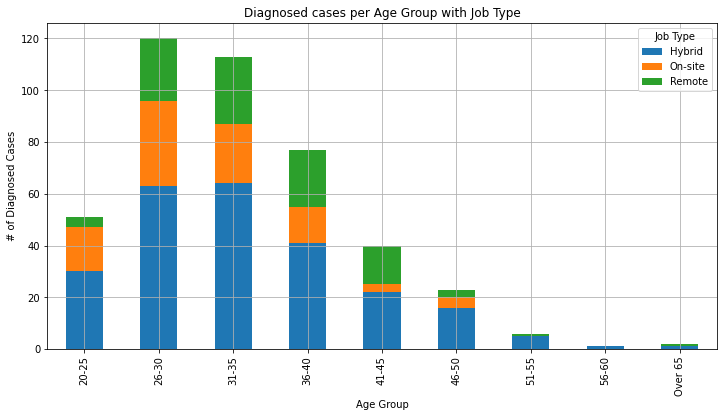

In [6]:
# Lets separate the data for rows marked as True for Mental Illness diagnosis.
diagnosed = mi_df[mi_df['Mental Illness (Diagnosed)'] == True]

# Converting Target column to integer to aid aggregation functions
diagnosed['Mental Illness (Diagnosed)'] = diagnosed['Mental Illness (Diagnosed)'].astype(int)

""" For plotting a stacked graph with:
    1. Cases dignosed per age group.
    2. Job type set as legend for each age bin.
    """

# Grouping values by Age Group and Job Type.
diagnoesd_grouped = diagnosed.groupby(['Age Group', 'Job Type'])['Mental Illness (Diagnosed)'].sum().reset_index()

#Creating a pivot of the table to use in stack efficiently.
diagnosed_pivoted = diagnoesd_grouped.pivot(index='Age Group', columns='Job Type', values='Mental Illness (Diagnosed)')

diagnosed_pivoted.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Diagnosed cases per Age Group with Job Type')
plt.xlabel('Age Group')
plt.ylabel('# of Diagnosed Cases')
plt.legend(title='Job Type')
plt.grid(True)
plt.show()


<ipython-input-4-d77125cba7a7>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  diagnosed_by_gender = diagnosed.groupby('Gender').sum().reset_index()


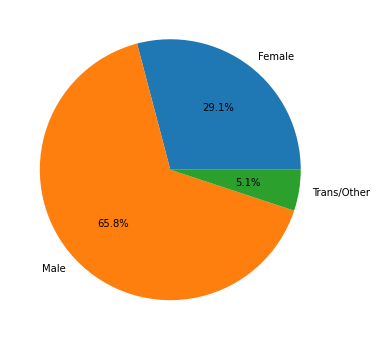

In [4]:
# Lets create a Pie plot of the Cases diagnosed by gender.
plt.figure(figsize=(12,6))

# Grouping by gender for this instance of the graph.
diagnosed_by_gender = diagnosed.groupby('Gender').sum().reset_index()

plt.pie(diagnosed_by_gender['Mental Illness (Diagnosed)'], autopct="%1.1f%%", 
        labels=diagnosed_by_gender['Gender'])

plt.show()

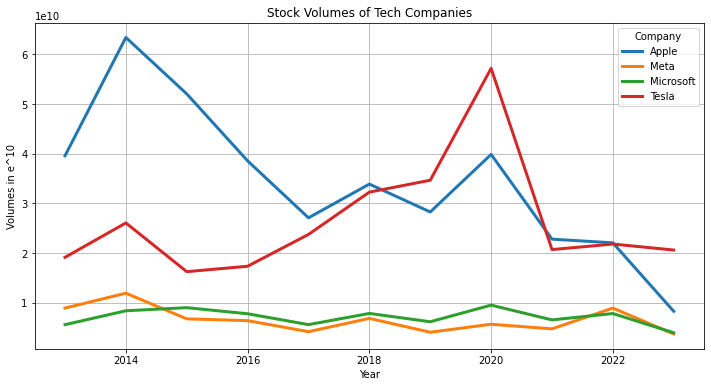

In [15]:
tech_stocks = pd.read_csv('./Data/Tech_stocks.csv')

# To declare a date time column for time series plotting.
tech_stocks['Date'] = pd.to_datetime(tech_stocks['Date'])

# Separate the years into a different column to pivot.
tech_stocks['Year'] = tech_stocks['Date'].dt.year
tech_stocks['Month'] = tech_stocks['Date'].dt.month

# To group the volumes of each company over the years and pivot them into a single table.
tech_stocks_grouped = tech_stocks.groupby(['Year', 'Company'])['Volume'].sum().reset_index()
tech_stocks_pivot = tech_stocks_grouped.pivot(index='Year', columns='Company', values='Volume')

# Creating a line plot for visualization.
tech_stocks_pivot.plot(kind='line', figsize=(12, 6), lw=3)
plt.title('Stock Volumes of Tech Companies')
plt.ylabel('Volumes in e^10')
plt.grid(True)
plt.legend(title='Company')
plt.show()